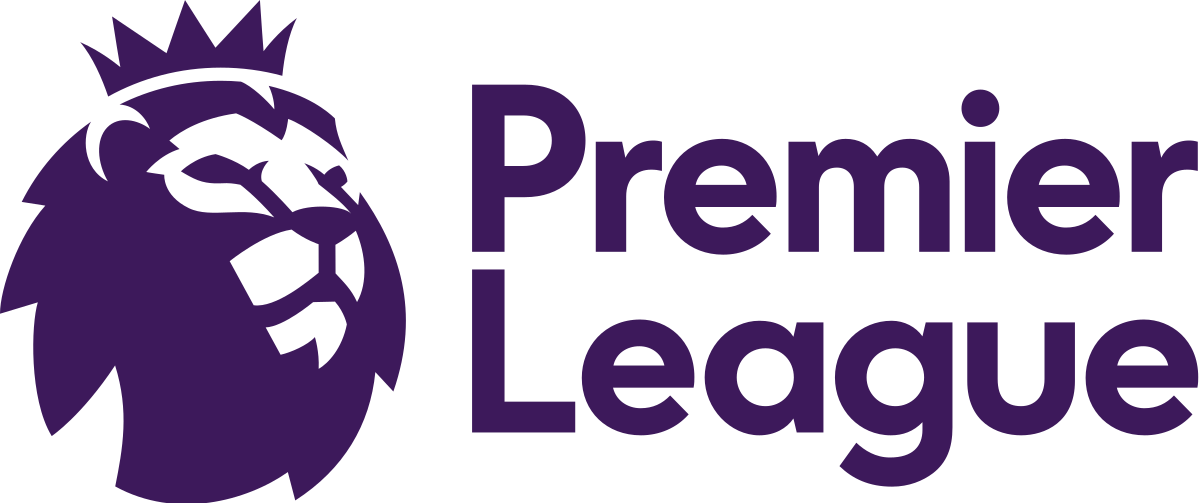

# In this notebook, We will have analysis and visualizations for the last 3 completed seasons in PL

## This Notebook will be divided into two parts: Web Scraping and Data Analysis

##### Importing libraries that is needed for this project

In [1]:
import pandas as pd
import numpy as np
import unidecode
import matplotlib.pyplot as plt
import seaborn as sns
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By

## Scraping Team Links for Each Season

##### In the next cell we will get link for each team in every season listed in "seasons" list to have detailed stats for each team later and result will be stored in "teams_link" list 

In [2]:
#Intiate Chrome Driver
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))

#Seasons to scrape
seasons=["2021-2022","2020-2021","2019-2020"]
#Intiate empty list of lists to store the resultant links in it
teams_link=[[] for i in range(len(seasons))]


# Main page of Premier League Stats
driver.get("https://fbref.com/en/comps/9/Premier-League-Stats")

#Scrape for each season
for season in range(len(seasons)):
    
    # We hit previous button to reach previous season
    previous=driver.find_element(By.XPATH,"/html/body/div[2]/div[4]/div[1]/div[2]/div/a")
    previous.click()
    
    #Find the table of standings by table then choosing cells on the left to obtain links
    standings=driver.find_element(By.ID,"results"+seasons[season]+"91_overall")\
                   .find_elements(By.CLASS_NAME,"left")
    
    #Obtain a tags for each row including teams and last matches
    a_tags=[]
    for i in range(len(standings)):
        a_tag=standings[i].find_elements(By.TAG_NAME,"a")
        a_tags.append(a_tag)
        
    # Obtain the links('href') for each team and exclude the last matches link
    for i in range(len(a_tags)):
        for j in range(len(a_tags[i])):
            team_link=a_tags[i][j].get_attribute("href")
            # Obtain team links only not last matches links
            if (team_link.find("https://fbref.com/en/squads") != -1):
                teams_link[season].append(team_link)   
#Quit session
driver.quit()

## Create Data Structure To Obtain The Data To Be Scraped for Teams

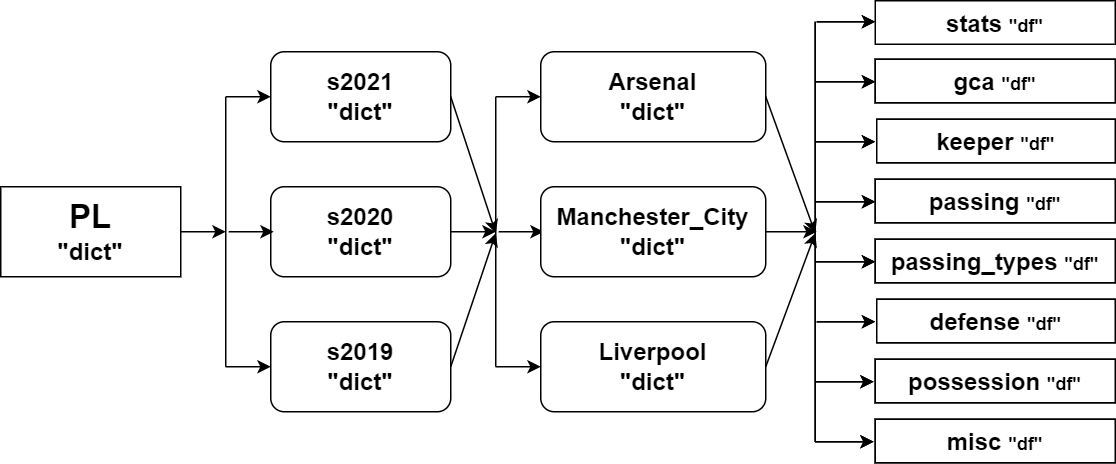

In [3]:
PL={}
teams={}
stats=["stats","gca","keepers","passing","passing_types","defense","possession","misc"]


# We want to get teams name participing in the competition every year 
# Every link in teams_link has "-Stats" in the end so we want to get rid from it and Let's take example
# "https://fbref.com/en/squads/b8fd03ef/2021-2022'/'Manchester-City-Stats"
# As you can see it and i put a / in single quotes to mark it. That's our start
# As this / , its place is constant in every link that explains the No. 47 written down in the slicing

for season in range(len(seasons)):
    for team in range(20):
        team_struc={}
        for stat in stats:
                #Create Structre for every team where each team has dataframe for every type of stats for the matches
                team_struc[stat]=pd.DataFrame(index=range(1,39))
        #Assign type of stats for each team
        teams[teams_link[season][team][47:-6].replace("-","_")]=team_struc
    PL['s' + seasons[season][:4]] = teams

## Scraping every match Stats for every team in every season

##### In the next cell we will get match stats for each team in every season listed in

In [4]:
#Intiate Chrome Driver
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))

#Loop for every season
for season in range(len(seasons)):
    
    #Loop for every team
    for team in range(20):
        
        # Main page of Team Stats
        driver.get(teams_link[season][team])
        
        #Convert matches to PL instead of All Competitions
        pl_matches=driver.find_element(By.XPATH,"/html/body/div[2]/div[7]/div[5]/div[2]")
        pl_matches=pl_matches.find_element(By.TAG_NAME,"a").get_attribute("href")
        driver.get(pl_matches)
        
        #Finds the table of stats
        matches=driver.find_element(By.ID,"matchlogs_for")

        #Get HTML of the table and read it into pandas df
        team_info=pd.read_html(matches.get_attribute("outerHTML"))
        PL["s"+seasons[season][:4]][teams_link[season][team][47:-6].replace("-","_")]["stats"]=team_info[0]
        
        #Make as info for rest of stats
        for stat in range(1,len(stats)):
            
            #Convert matches to Desired Stat instead of Scores & Fixtures
            stat_matches=driver.find_element(By.XPATH,"/html/body/div[2]/div[7]/div[3]/div["+str((stat+1))+"]/a")\
            .get_attribute("href")
            driver.get(stat_matches)
            
        
            #Scrap stats about matches for each team
            #Finds the table of stats
            matches=driver.find_element(By.ID,"matchlogs_for")
            #Get HTML of the table and read it into pandas df
            team_stat=pd.read_html(matches.get_attribute("outerHTML"))
            #Assign the table to the desired df
            PL["s"+seasons[season][:4]][teams_link[season][team][47:-6].replace("-","_")][stats[(stat)]]=team_stat[0]

        
        
#Quit session
driver.quit()        

AttributeError: 'NoneType' object has no attribute 'find_element'

## Scraping players list for each team

##### Get list of players of every team in each season and store it in "team_players"  df 

In [5]:
#Intiate Chrome Driver
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))
team_players=[[] for i in range(len(seasons))]

#Loop for every season
for season in range(len(seasons)):
    
    #Loop for every team
    for team in range(20):
        
        # Main page of Team Stats
        driver.get(teams_link[season][team])
        
        #Scrap table about players for each team
        matches=driver.find_element(By.ID,"div_stats_standard_9")
        players=pd.read_html((matches.get_attribute("innerHTML")))
        
        #Append DataFrame for each team to list "team_players"
        team_players[season].append(players[0])

#Quit session
driver.quit()                

NoSuchWindowException: Message: no such window: target window already closed
from unknown error: web view not found
  (Session info: chrome=107.0.5304.88)
Stacktrace:
Backtrace:
	Ordinal0 [0x0100ACD3+2075859]
	Ordinal0 [0x00F9EE61+1633889]
	Ordinal0 [0x00E9B7BD+571325]
	Ordinal0 [0x00E82E1A+470554]
	Ordinal0 [0x00EEAA0B+895499]
	Ordinal0 [0x00EFAC96+961686]
	Ordinal0 [0x00EE7136+880950]
	Ordinal0 [0x00EBFEFD+720637]
	Ordinal0 [0x00EC0F3F+724799]
	GetHandleVerifier [0x012BEED2+2769538]
	GetHandleVerifier [0x012B0D95+2711877]
	GetHandleVerifier [0x0109A03A+521194]
	GetHandleVerifier [0x01098DA0+516432]
	Ordinal0 [0x00FA682C+1665068]
	Ordinal0 [0x00FAB128+1683752]
	Ordinal0 [0x00FAB215+1683989]
	Ordinal0 [0x00FB6484+1729668]
	BaseThreadInitThunk [0x76A8FA29+25]
	RtlGetAppContainerNamedObjectPath [0x77677BBE+286]
	RtlGetAppContainerNamedObjectPath [0x77677B8E+238]


## Manipulation players list for each team

##### Manipulate df scraped "team_players" and clean it

In [6]:
for season in range(len(seasons)):
    for team in range(len(team_players[season])):
        player=len(team_players[season][team])
        #Drop headers that are repated in middle of the table
        team_players[season][team]=team_players[season][team].drop(index=[20,21,(player-1),(player-2)])
        #Drop the level of headers that include
        team_players[season][team].columns=team_players[season][team].columns.droplevel()
        team_players[season][team]=team_players[season][team].iloc[:,:4]
        team_players[season][team]=team_players[season][team].reset_index(drop=True)
        for player in range(len(team_players[season][team])):
                    team_players[season][team].iloc[player,0]=unidecode.unidecode(team_players[season][team].iloc[player,0])
                    team_players[season][team]["Nation"][player]=team_players[season][team]["Nation"][player][-3:]


## Create Data Structure To Obtain The Data To Be Scraped for Players

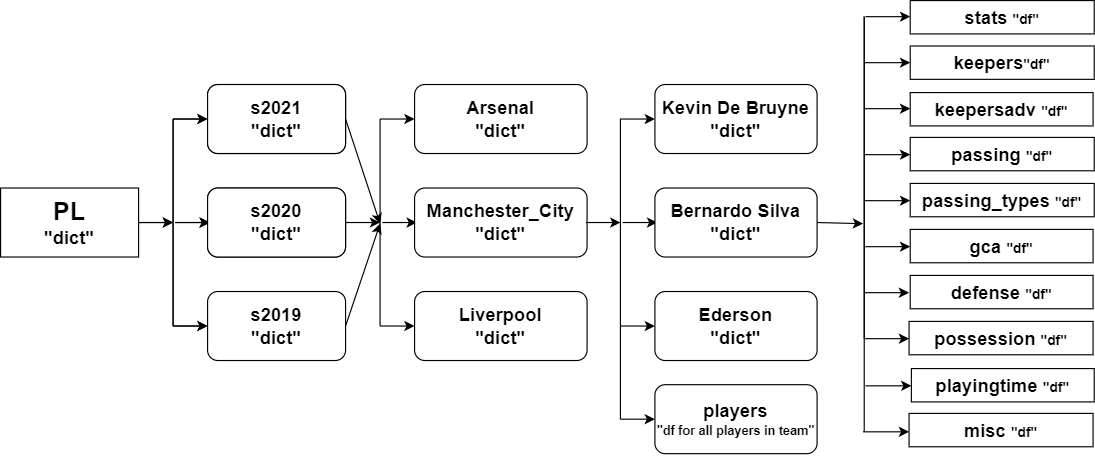

In [7]:
stats=["stats","keepers","keepersadv","passing","passing_types","gca","defense","possession","playingtime","misc"]
    
for season in range(len(seasons)):
    for team in range(20):
        
        #Create df for viewing all the players for the team
        PL["s"+seasons[season][:4]][teams_link[season][team][47:-6].replace("-","_")]["players"]=team_players[season][team]
        
        for player in range(len(team_players[season][team])):
            
            #Create dict for every player for later to hold the stats for each one of them
            PL["s"+seasons[season][:4]][teams_link[season][team][47:-6].replace("-","_")]\
            [team_players[season][team]["Player"][player]]={}
            
            for stat in stats:
                
                #Create stat df to hold stat for every player
                PL["s"+seasons[season][:4]][teams_link[season][team][47:-6].replace("-","_")]\
                [team_players[season][team]["Player"][player]][stat]\
                =pd.DataFrame()

IndexError: list index out of range

## Scraping every player Stats for every team in every season

##### In the next cell we will get match stats for each team in every season listed in

In [55]:
stats=["stats","passing","passing_types","gca","defense","possession","misc"]
#Intiate Chrome Driver
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))

#Loop for every season
for season in range(len(seasons)):
    
    #Loop for every team
    for team in range(20):
        
        # Loop for every player
        for player in range(1,(len(team_players[season][team])+2)):
            
            # Main page of Team Stats
            driver.get(teams_link[season][team])
            
            #Direct to player stats page
            player_pg=driver.find_element(By.XPATH,"/html/body/div[2]/div[7]/div[3]/div[2]/table/tbody/tr["+str(player)+"]/td[29]")
            player_pg=player_pg.find_element(By.TAG_NAME,"a").get_attribute("href")
            driver.get(player_pg)
            
            #Convert matches to PL instead of All Competitions
            pl_matches=driver.find_element(By.XPATH,"/html/body/div[2]/div[7]/div[2]/div[2]")
            pl_matches=pl_matches.find_element(By.TAG_NAME,"a").get_attribute("href")
            driver.get(pl_matches)
            
            #Finds the table of stats
            matches=driver.find_element(By.ID,"matchlogs_"+seasons[season]+"_9")
    
            #Get HTML of the table and read it into pandas df
            player_stats=pd.read_html(matches.get_attribute("outerHTML"))
            PL["s"+seasons[season][:4]][teams_link[season][team][47:-6].replace("-","_")]\
            [team_players[season][team]["Player"][player]]["stats"]=player_stats[0]
            
            #Make as info for rest of stats
            for stat in range(1,(len(stats)-1)):
                
                #Convert matches to Desired Stat instead of Scores & Fixtures
                stat_matches=driver.find_element(By.XPATH,"/html/body/div[2]/div[7]/div[3]/div["+str((stat+2))+"]/a")\
                .get_attribute("href")
                driver.get(stat_matches)

                #Scrap stats about matches for each player
                #Finds the table of stats
                matches=driver.find_element(By.ID,"matchlogs_"+seasons[season]+"_9")
                #Get HTML of the table and read it into pandas df
                player_stat=pd.read_html(matches.get_attribute("outerHTML"))
                #Assign the table to the desired df
                PL["s"+seasons[season][:4]][teams_link[season][team][47:-6].replace("-","_")]\
                [team_players[season][team]["Player"][player]][stats[(stat)]]=player_stat[0]
                
            if team_players[season][team]["Pos"][player] == "GK":
                
                #Convert to GK section
                stat_matches=driver.find_element(By.XPATH,"/html/body/div[2]/div[7]/div[3]/div[1]/a")\
                .get_attribute("href")
                driver.get(stat_matches)

                #Scrap stats about matches for each player
                #Finds the table of stats
                matches=driver.find_element(By.ID,"matchlogs_"+seasons[season]+"_9")
                #Get HTML of the table and read it into pandas df
                player_stat=pd.read_html(matches.get_attribute("outerHTML"))
                #Assign the table to the desired df
                PL["s"+seasons[season][:4]][teams_link[season][team][47:-6].replace("-","_")]\
                [team_players[season][team]["Player"][player]][stats[(stat)]]=player_stat[0]
            
        
#Quit session
driver.quit()        

InvalidArgumentException: Message: invalid argument: 'url' must be a string
  (Session info: chrome=107.0.5304.88)
Stacktrace:
Backtrace:
	Ordinal0 [0x0100ACD3+2075859]
	Ordinal0 [0x00F9EE61+1633889]
	Ordinal0 [0x00E9B7BD+571325]
	Ordinal0 [0x00EFBD46+965958]
	Ordinal0 [0x00EE731C+881436]
	Ordinal0 [0x00EFB56A+963946]
	Ordinal0 [0x00EE7136+880950]
	Ordinal0 [0x00EBFEFD+720637]
	Ordinal0 [0x00EC0F3F+724799]
	GetHandleVerifier [0x012BEED2+2769538]
	GetHandleVerifier [0x012B0D95+2711877]
	GetHandleVerifier [0x0109A03A+521194]
	GetHandleVerifier [0x01098DA0+516432]
	Ordinal0 [0x00FA682C+1665068]
	Ordinal0 [0x00FAB128+1683752]
	Ordinal0 [0x00FAB215+1683989]
	Ordinal0 [0x00FB6484+1729668]
	BaseThreadInitThunk [0x76A8FA29+25]
	RtlGetAppContainerNamedObjectPath [0x77677BBE+286]
	RtlGetAppContainerNamedObjectPath [0x77677B8E+238]


In [56]:
player_pg

[]

In [47]:
def PL(season,team,player,stat="players"):
    

For Manchester City                                                      \
                 Date           Time        Round  Day Venue Result GF GA   
0          2021-08-15  16:30 (17:30)  Matchweek 1  Sun  Away      L  0  1   

             Standard  ...                   Expected                     \
    Opponent      Gls  ...  Dist FK PK PKatt       xG npxG npxG/Sh  G-xG   
0  Tottenham        0  ...  17.3  1  0     0      2.0  2.0    0.11  -2.0   

          Unnamed: 24_level_0  
  np:G-xG        Match Report  
0    -2.0        Match Report  

[1 rows x 25 columns]